In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
from freq_pd import proc_freq

In [5]:
prod_clusters = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\product_clusters.csv',dtype={'Item_Number':str}, index_col=0)

In [6]:
pdtypes = {'Item Number':str,'Vendor':str}

In [7]:
# products_iowa = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\Iowa_Liquor_Products(1).csv',dtype=pdtypes)

In [8]:
# products_iowa.rename({'Item Description':'Item_Description'} ,axis=1, inplace=True)

In [9]:
# products_iowa.info()

In [10]:
# products_iowa.head()

In [11]:
# products_iowa.drop(columns=['UPC','SCC',])

In [12]:
# proc_freq(products_iowa,'Age') 96% have age zero

In [13]:
# item_trans_category = item_trans_category.merge(products, how='inner', on=['Item_Number','Category'])

In [14]:
# prod_clusters_iowa = prod_clusters.merge(products_iowa, how='inner',on=['Item Description'])

In [15]:
prod_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4462 entries, 1 to 4470
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            4462 non-null   int64  
 1   New_Category_Name   4462 non-null   object 
 2   Item_Number         4462 non-null   object 
 3   Item_Description    4462 non-null   object 
 4   Bottle_Volume       4462 non-null   int64  
 5   Bottle_Retail       4462 non-null   float64
 6   Bottles_Sold        4462 non-null   int64  
 7   cluster_name        4462 non-null   object 
 8   revenue             4462 non-null   float64
 9   Num_Stores_Selling  4462 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 383.5+ KB


In [16]:
prod_clusters.describe()

,Category,Bottle_Volume,Bottle_Retail,Bottles_Sold,revenue,Num_Stores_Selling
count,4.462000e+03,4462.000000,4462.000000,4462.000000,4.462000e+03,4462.000000
mean,1.136678e+06,790.227028,29.719014,6478.391528,9.610740e+04,125.333483
std,2.541869e+05,399.817317,36.420953,24398.679277,3.940154e+05,214.162210
min,1.011000e+06,20.000000,0.990000,1.000000,7.500000e+00,1.000000
25%,1.012300e+06,750.000000,11.810000,54.000000,1.404000e+03,3.000000
50%,1.032200e+06,750.000000,20.250000,553.000000,1.312312e+04,49.000000
75%,1.081300e+06,750.000000,35.032500,3631.000000,5.383688e+04,155.000000
max,1.901200e+06,2400.000000,637.410000,563260.000000,1.062280e+07,1725.000000


In [17]:

everything_else = prod_clusters.loc[prod_clusters['cluster_name']=='Everything_Else',:]

In [18]:
everything_else.head(10)

,Category,New_Category_Name,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue,Num_Stores_Selling
1,1012200,Scotch,10006,Scoresby Rare Scotch,750,7.70,4619,Everything_Else,35566.30,197
2,1701100,Temporary & Specialty Packages,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,Everything_Else,42006.72,136
4,1012200,Scotch,10009,Scoresby Rare Scotch,1000,10.11,1722,Everything_Else,17409.42,70
5,1701100,Temporary & Specialty Packages,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,Everything_Else,25082.34,120
6,1701100,Temporary & Specialty Packages,100202,Baileys Original Irish Cream w/2 Dessert Bowls,750,24.74,3160,Everything_Else,78178.40,149
7,1700000,Temporary & Specialty Packages,100210,Clyde Mays Dualpack,750,30.00,66,Everything_Else,1980.00,1
8,1701100,Temporary & Specialty Packages,100215,Tequila Rose Liqueur w/2 Shot Glasses,750,17.25,1191,Everything_Else,20544.75,161
9,1701100,Temporary & Specialty Packages,100216,Tarantula Azul Holiday w/2 Shot Glasses,750,13.49,133,Everything_Else,1794.17,24
10,1701100,Temporary & Specialty Packages,100248,Martell Blue Swift w/ 2 Glasses,750,31.47,47,Everything_Else,1479.09,8
11,1071100,Cocktails,100280,The Bitter Truth Cocktail Bar Pack,20,14.25,180,Everything_Else,2565.00,38


In [19]:
scaler = StandardScaler()

In [20]:
everything_else[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
                                           (everything_else[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']])
                                                   

everything_else[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled']].describe()

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled
count,3.833000e+03,3.833000e+03,3.833000e+03
mean,-3.963320e-15,-6.292326e-16,-1.736588e-16
std,1.000130e+00,1.000130e+00,1.000130e+00
min,-2.731413e+00,-1.299213e+00,-3.903456e-01
25%,2.911255e-01,-7.533094e-01,-3.860975e-01
50%,2.911255e-01,-2.744463e-01,-3.462382e-01
75%,2.911255e-01,4.438484e-01,-9.460900e-02
max,2.154334e+00,4.035322e+00,8.423273e+00


determine optimal number of clusters

In [21]:
from sklearn.metrics import silhouette_score

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]

df_scaled = everything_else[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.5497907239664356
number of clusters =  3   silhouette score =  0.5572031143492671
number of clusters =  4   silhouette score =  0.5194126296587561
number of clusters =  5   silhouette score =  0.4442314456582868
number of clusters =  6   silhouette score =  0.4618616128384074
number of clusters =  7   silhouette score =  0.46950143658668136
number of clusters =  8   silhouette score =  0.48292981677159486
number of clusters =  9   silhouette score =  0.4594873549134515
number of clusters =  10   silhouette score =  0.46755975723073473


In [22]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

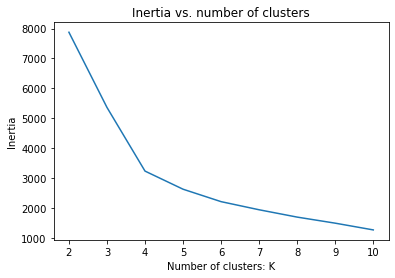

In [23]:
plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

get three sub-clusters from everything_else

In [24]:
cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


model = KMeans(n_clusters=4, random_state=42)

model.fit(everything_else[cluster_cols])

everything_else['sub_cluster'] = model.predict(everything_else[cluster_cols])

C:\Users\dgarb\AppData\Local\Temp/ipykernel_29156/3938904934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['sub_cluster'] = model.predict(everything_else[cluster_cols])


In [25]:
everything_else.head()

,Category,New_Category_Name,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,cluster_name,revenue,Num_Stores_Selling,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,sub_cluster
1,1012200,Scotch,10006,Scoresby Rare Scotch,750,7.70,4619,Everything_Else,35566.30,197,0.291126,-0.942194,0.027048,3
2,1701100,Temporary & Specialty Packages,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,Everything_Else,42006.72,136,0.291126,-0.517602,-0.148297,3
4,1012200,Scotch,10009,Scoresby Rare Scotch,1000,10.11,1722,Everything_Else,17409.42,70,1.326242,-0.813965,-0.234795,3
5,1701100,Temporary & Specialty Packages,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,Everything_Else,25082.34,120,0.291126,0.850350,-0.335663,0
6,1701100,Temporary & Specialty Packages,100202,Baileys Original Irish Cream w/2 Dessert Bowls,750,24.74,3160,Everything_Else,78178.40,149,0.291126,-0.035547,-0.104822,3


In [26]:
everything_else['Bottle_Volume_liters'] = everything_else['Bottle_Volume']/1000

C:\Users\dgarb\AppData\Local\Temp/ipykernel_29156/2100188245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['Bottle_Volume_liters'] = everything_else['Bottle_Volume']/1000


# create price per milliliter

In [27]:
# price/volume
everything_else['price_per_ml'] = everything_else['Bottle_Retail'] / everything_else['Bottle_Volume']

C:\Users\dgarb\AppData\Local\Temp/ipykernel_29156/1856010719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['price_per_ml'] = everything_else['Bottle_Retail'] / everything_else['Bottle_Volume']


In [28]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume_liters' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean' })

,Bottle_Volume_liters,Bottle_Retail,Bottles_Sold
sub_cluster,,,
0,0.735101,54.567628,604.565693
1,0.176157,12.441754,4100.488246
2,0.636565,12.942517,51408.700680
3,0.783211,18.931960,2698.389875


In [29]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

Bottle_Volume                                      Bottle_Retail  \
                      min   max         std median        mean           min   
sub_cluster                                                                    
0                      50  1200  128.411501  750.0  735.100973         36.51   
1                      20   400  142.853993  100.0  176.157324          0.99   
2                      50  1000  315.838633  750.0  636.564626          1.43   
3                     750  1000   84.370797  750.0  783.210731          3.20   

                                                 Bottles_Sold         \
                max        std median       mean          min    max   
sub_cluster                                                            
0            101.25  15.980239  49.35  54.567628            1  26065   
1             55.26  10.080200   9.00  12.441754            1  32385   
2             40.47   8.857570  11.25  12.942517        28404  97514   
3             41.24   8.453470  18.51  18.931960            1  27930   

                                                  
                      std   median          mean  
sub_cluster                                       
0             1780.086815     84.0    604.565693  
1             6112.117742   1327.0   4100.488246  
2            19457.478880  45126.0  51408.700680  
3             4524.993823    666.0   2698.389875

In [30]:
from freq_pd import proc_freq

In [31]:
proc_freq(everything_else,'sub_cluster')

,sub_cluster,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,0,822,21.45,822,21.45
1,1,553,14.43,1375,35.87
2,2,147,3.84,1522,39.71
3,3,2311,60.29,3833,100.00


In [32]:
everything_else['str_volume'] = str(everything_else.Bottle_Volume)

C:\Users\dgarb\AppData\Local\Temp/ipykernel_29156/1745242950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['str_volume'] = str(everything_else.Bottle_Volume)


In [33]:
df = everything_else.groupby(['sub_cluster']).agg({'revenue':'sum'})
df.style.format("{:.0f}")


,revenue
sub_cluster,
0,24297472
1,19548793
2,97170859
3,96363023


In [34]:
everything_else.groupby(['sub_cluster']).agg({'Bottle_Volume':'nunique'})

,Bottle_Volume
sub_cluster,
0,10
1,8
2,6
3,6


In [67]:


everything_else.groupby(['sub_cluster']).agg({'revenue':['sum'],'Bottle_Volume':['count','min','max','std', 'median', 'mean'],'Bottle_Retail':['min','max','std', 'median', 'mean'], 'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

revenue Bottle_Volume                                \
                     sum         count  min   max         std median   
sub_cluster                                                            
0            24297471.91           822   50  1200  128.411501  750.0   
1            19548793.43           553   20   400  142.853993  100.0   
2            97170858.83           147   50  1000  315.838633  750.0   
3            96363022.69          2311  750  1000   84.370797  750.0   

                        Bottle_Retail                                       \
                   mean           min     max        std median       mean   
sub_cluster                                                                  
0            735.100973         36.51  101.25  15.980239  49.35  54.567628   
1            176.157324          0.99   55.26  10.080200   9.00  12.441754   
2            636.564626          1.43   40.47   8.857570  11.25  12.942517   
3            783.210731          3.20   41.24   8.453470  18.51  18.931960   

            price_per_ml                                       Bottles_Sold  \
                     min     max       std    median      mean          min   
sub_cluster                                                                   
0                0.03876  1.9440  0.255045  0.065353  0.115521            1   
1                0.00688  1.1052  0.213805  0.080000  0.166309            1   
2                0.00320  0.7740  0.078060  0.019050  0.034703        28404   
3                0.00320  0.0490  0.011391  0.023600  0.024588            1   

                                                         
               max           std   median          mean  
sub_cluster                                              
0            26065   1780.086815     84.0    604.565693  
1            32385   6112.117742   1327.0   4100.488246  
2            97514  19457.478880  45126.0  51408.700680  
3            27930   4524.993823    666.0   2698.389875

In [36]:
everything_else.groupby(['sub_cluster']).agg({'Num_Stores_Selling':['min','max','std', 'median', 'mean']})

Num_Stores_Selling                                     
                           min   max         std median        mean
sub_cluster                                                        
0                            1   901   89.470278    7.0   51.177616
1                            1  1308  190.060557   91.0  148.079566
2                           25  1551  407.865701  517.0  654.829932
3                            1   932  123.654061   47.0   94.360883

In [37]:
pd.set_option('display.max_columns', None)
everything_else.groupby(['sub_cluster']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['min','max','std','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

Item_Number      revenue Bottle_Volume                           \
                nunique          sum           min   max         std median   
sub_cluster                                                                   
0                   822  24297471.91            50  1200  128.411501  750.0   
1                   553  19548793.43            20   400  142.853993  100.0   
2                   147  97170858.83            50  1000  315.838633  750.0   
3                  2311  96363022.69           750  1000   84.370797  750.0   

            price_per_ml                                       Bottles_Sold  \
                     min     max       std    median      mean          min   
sub_cluster                                                                   
0                0.03876  1.9440  0.255045  0.065353  0.115521            1   
1                0.00688  1.1052  0.213805  0.080000  0.166309            1   
2                0.00320  0.7740  0.078060  0.019050  0.034703        28404   
3                0.00320  0.0490  0.011391  0.023600  0.024588            1   

                                                        Num_Stores_Selling  \
               max           std   median          mean                min   
sub_cluster                                                                  
0            26065   1780.086815     84.0    604.565693                  1   
1            32385   6112.117742   1327.0   4100.488246                  1   
2            97514  19457.478880  45126.0  51408.700680                 25   
3            27930   4524.993823    666.0   2698.389875                  1   

                                                  
              max         std median        mean  
sub_cluster                                       
0             901   89.470278    7.0   51.177616  
1            1308  190.060557   91.0  148.079566  
2            1551  407.865701  517.0  654.829932  
3             932  123.654061   47.0   94.360883

In [38]:
everything_else['str_volume'] = [str(prod) for prod in everything_else.Bottle_Volume ]
# [str(prod) for prod in everything_else.Bottle_Volume ]

C:\Users\dgarb\AppData\Local\Temp/ipykernel_29156/3195886119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['str_volume'] = [str(prod) for prod in everything_else.Bottle_Volume ]


# Name sub-clusters

In [39]:
sub_clust_dict = {0:'most_variety', 1:'moderately_high', 2:'quick_shots', 3:'cheap'}
# everything_else['sub_cluster'].map(sub_clust_dict)
everything_else['sub_cluster_name'] = everything_else['sub_cluster'].map(sub_clust_dict)

C:\Users\dgarb\AppData\Local\Temp/ipykernel_29156/1314442791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everything_else['sub_cluster_name'] = everything_else['sub_cluster'].map(sub_clust_dict)


In [40]:
# df_categ = everything_else.groupby(['sub_cluster','New_Category_Name']).agg({'price_per_ml':['min','max','std', 'median', 'mean']}).reset_index()

In [41]:
# df_categ.loc[df_categ.sub_cluster==2,:]

In [42]:
moderately_high = everything_else.loc[everything_else['sub_cluster_name']== 'moderately_high',['Item_Number', 'Item_Description','revenue','Bottle_Retail','Bottle_Volume','Bottles_Sold']]

In [43]:
moderately_high

,Item_Number,Item_Description,revenue,Bottle_Retail,Bottle_Volume,Bottles_Sold
11,100280,The Bitter Truth Cocktail Bar Pack,2565.00,14.25,20,180
17,100531,Crystal Head Vodka Mini Patriotic Package,506.00,20.24,150,25
19,100568,Bourbon Time,22506.00,33.00,375,682
23,100612,Johnnie Walker Mini Discovery Pack,7191.75,32.25,50,223
27,100636,Jim Beam Mini 12 Seasons,28947.75,9.75,50,2969
...,...,...,...,...,...,...
4372,994624,Buchanan Deluxe 12YR,1780.30,18.74,375,95
4380,994812,Wisconsin Club Vodka,172.80,14.40,50,12
4449,999911,HA Wine-Finished Bourbon,1740.00,29.00,375,60
4467,999993,Kings County Distillery Wheat Whiskey,1530.24,31.88,375,48


In [44]:
mask1 = moderately_high.Bottle_Volume < 750
moderately_high[mask1]

,Item_Number,Item_Description,revenue,Bottle_Retail,Bottle_Volume,Bottles_Sold
11,100280,The Bitter Truth Cocktail Bar Pack,2565.00,14.25,20,180
17,100531,Crystal Head Vodka Mini Patriotic Package,506.00,20.24,150,25
19,100568,Bourbon Time,22506.00,33.00,375,682
23,100612,Johnnie Walker Mini Discovery Pack,7191.75,32.25,50,223
27,100636,Jim Beam Mini 12 Seasons,28947.75,9.75,50,2969
...,...,...,...,...,...,...
4372,994624,Buchanan Deluxe 12YR,1780.30,18.74,375,95
4380,994812,Wisconsin Club Vodka,172.80,14.40,50,12
4449,999911,HA Wine-Finished Bourbon,1740.00,29.00,375,60
4467,999993,Kings County Distillery Wheat Whiskey,1530.24,31.88,375,48


In [45]:
moderately_high[mask1].shape

(553, 6)

In [46]:
mask2 = moderately_high.Bottle_Volume > 750
moderately_high[mask2]

,Item_Number,Item_Description,revenue,Bottle_Retail,Bottle_Volume,Bottles_Sold


In [47]:
sub_most_variety = everything_else.loc[everything_else.sub_cluster_name== 'most_variety']
proc_freq(sub_most_variety,'str_volume')
sub_most_variety.str_volume.value_counts()

750     766
50       24
1000     21
600       4
375       2
800       1
950       1
850       1
1200      1
603       1
Name: str_volume, dtype: int64

In [48]:
sub_moderately_high = everything_else.loc[everything_else.sub_cluster_name =='moderately_high']
proc_freq(sub_moderately_high,'str_volume')
sub_moderately_high.str_volume.value_counts()

50     266
375    170
200     84
100     28
20       2
150      1
400      1
175      1
Name: str_volume, dtype: int64

In [49]:
sub_quick_shots = everything_else.loc[everything_else.sub_cluster_name=='quick_shots']
proc_freq(sub_quick_shots,'str_volume')
sub_quick_shots.str_volume.value_counts()

750     55
1000    39
375     25
200     15
50       7
100      6
Name: str_volume, dtype: int64

In [50]:
sub_cheap = everything_else.loc[everything_else.sub_cluster_name== 'cheap']
proc_freq(sub_cheap,'str_volume')
sub_cheap.str_volume.value_counts()

750     1995
1000     301
850        6
800        5
900        3
950        1
Name: str_volume, dtype: int64

In [51]:
everything_else.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 1 to 4470
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              3833 non-null   int64  
 1   New_Category_Name     3833 non-null   object 
 2   Item_Number           3833 non-null   object 
 3   Item_Description      3833 non-null   object 
 4   Bottle_Volume         3833 non-null   int64  
 5   Bottle_Retail         3833 non-null   float64
 6   Bottles_Sold          3833 non-null   int64  
 7   cluster_name          3833 non-null   object 
 8   revenue               3833 non-null   float64
 9   Num_Stores_Selling    3833 non-null   int64  
 10  Bottle_Volume_scaled  3833 non-null   float64
 11  Bottle_Retail_scaled  3833 non-null   float64
 12  Bottles_Sold_scaled   3833 non-null   float64
 13  sub_cluster           3833 non-null   int32  
 14  Bottle_Volume_liters  3833 non-null   float64
 15  price_per_ml         

In [52]:
everything_else2 = everything_else.copy()

In [53]:
sub_clust_dict = {0:'most_variety', 1:'moderately_high', 2:'quick_shots', 3:'cheap'}
everything_else2['cluster_name'] = everything_else2[['sub_cluster']].apply(lambda p: sub_clust_dict[p[0]],axis=1)

In [54]:
everything_else2['cluster_name'].head()

1           cheap
2           cheap
4           cheap
5    most_variety
6           cheap
Name: cluster_name, dtype: object

In [55]:
keeps = ['Item_Number','Item_Description','Bottle_Volume','Bottle_Retail', 'Bottles_Sold', 'cluster_name',
         'revenue', 'Num_Stores_Selling', 'New_Category_Name']


everything_else_keep = everything_else2[keeps]
everything_else_keep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 1 to 4470
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         3833 non-null   object 
 1   Item_Description    3833 non-null   object 
 2   Bottle_Volume       3833 non-null   int64  
 3   Bottle_Retail       3833 non-null   float64
 4   Bottles_Sold        3833 non-null   int64  
 5   cluster_name        3833 non-null   object 
 6   revenue             3833 non-null   float64
 7   Num_Stores_Selling  3833 non-null   int64  
 8   New_Category_Name   3833 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 299.5+ KB


In [56]:
prod_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4462 entries, 1 to 4470
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            4462 non-null   int64  
 1   New_Category_Name   4462 non-null   object 
 2   Item_Number         4462 non-null   object 
 3   Item_Description    4462 non-null   object 
 4   Bottle_Volume       4462 non-null   int64  
 5   Bottle_Retail       4462 non-null   float64
 6   Bottles_Sold        4462 non-null   int64  
 7   cluster_name        4462 non-null   object 
 8   revenue             4462 non-null   float64
 9   Num_Stores_Selling  4462 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 383.5+ KB


In [57]:
other_original_clusters = prod_clusters.loc[prod_clusters['cluster_name'] != 'Everything_Else',:]

In [58]:
everything_else_keep.shape

(3833, 9)

In [59]:
other_original_clusters.shape

(629, 10)

In [60]:
prod_clusters.shape

(4462, 10)

In [61]:
3865 + 603

4468

In [62]:
final_clusters = pd.concat([everything_else_keep,other_original_clusters], axis=0)

In [63]:
final_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4462 entries, 1 to 4450
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4462 non-null   object 
 1   Item_Description    4462 non-null   object 
 2   Bottle_Volume       4462 non-null   int64  
 3   Bottle_Retail       4462 non-null   float64
 4   Bottles_Sold        4462 non-null   int64  
 5   cluster_name        4462 non-null   object 
 6   revenue             4462 non-null   float64
 7   Num_Stores_Selling  4462 non-null   int64  
 8   New_Category_Name   4462 non-null   object 
 9   Category            629 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 383.5+ KB


In [64]:
final_clusters.groupby(['cluster_name']).agg({'Num_Stores_Selling':'nunique'})

,Num_Stores_Selling
cluster_name,
High End,54
Popular_Bottles,41
Volume_For_Dollar,247
cheap,404
moderately_high,273
most_variety,198
quick_shots,142


In [65]:
final_clusters.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\final_clusters.csv')